In [1]:
import pandas as pd
df=pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 62.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df['Embarked'].fillna('S',inplace=True)
df=df.drop(columns=["Cabin","Ticket","PassengerId"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


In [6]:
df["Family Size"]=df["SibSp"]+df["Parch"]+1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,1
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,1
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,1
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,5
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,2


In [7]:
df1=df["Name"].str.extract(pat="([A-Za-z]+)\.")
df=df.join(df1)
df=df.rename(columns={0:"Title"})
df.head()
df["Title"].replace({ """Capt""":"""Officer""", """Col""":  """Officer""",  
                     """Major""":  """Officer""",  """Dr""": """Officer""",  
                     """Rev""": """Officer""", 
                     """Jonkheer""":   """Royalty""", 
                     """Don""":   """Royalty""",    """Sir""" :   """Royalty""",   
                     """Lady""" :   """Royalty""",  """the Countess""" : """Royalty""",    
                     """Dona""":  """Royalty""",  
                     """Mme""":    """Miss""",    """Mlle""":   """Miss""",   """Miss""" :    
                     """Miss""",  """Ms""":   """Mrs""", """Mr""" :    """Mrs""", 
                     """Mrs""" :       """Mrs""",   
                     """Master""" :    """Master""" },inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Title
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,1,Mrs
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,1,Mrs
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,1,Mrs
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,5,Mrs
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,2,Mrs


In [8]:
df=df.drop("Name",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Title
0,No,2,male,28.0,0,0,13.0000,S,1,Mrs
1,No,3,male,25.0,0,0,7.6500,S,1,Mrs
2,No,3,male,20.0,0,0,7.8542,S,1,Mrs
3,No,3,female,29.0,0,4,21.0750,S,5,Mrs
4,No,1,male,31.0,1,0,52.0000,S,2,Mrs


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df["Survived"])
df=pd.get_dummies(df,columns=["Embarked","Title","Sex"])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,Embarked_C,Embarked_Q,Embarked_S,Title_Countess,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male
0,0,2,28.0,0,0,13.0000,1,0,0,1,0,0,0,1,0,0,0,1
1,0,3,25.0,0,0,7.6500,1,0,0,1,0,0,0,1,0,0,0,1
2,0,3,20.0,0,0,7.8542,1,0,0,1,0,0,0,1,0,0,0,1
3,0,3,29.0,0,4,21.0750,5,0,0,1,0,0,0,1,0,0,1,0
4,0,1,31.0,1,0,52.0000,2,0,0,1,0,0,0,1,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
x=df[[ "Sex_female","Sex_male","Embarked_C",
      "Embarked_Q","Embarked_S","Title_Countess","Title_Master","Title_Miss","Title_Mrs","Title_Officer","Title_Royalty"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

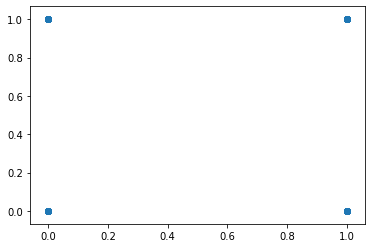

In [12]:
import seaborn as sns
sns.regplot(x="Sex_male",y= "Survived",data=df,logistic=True)

In [13]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Actual Label"],colnames=["Predicted labed"])
print(confusion_matrix)

Predicted labed    0   1
Actual Label            
0                156  33
1                 36  87


In [14]:
print("The model's sensitivity is ",87/(87+36),"so, 70.73% of passengers who survived the iceberg accident were correctly predicted")
print("the model's specificity is",156/(156+33),"which means that 82.54% of unsurvived passengers were correctly predicted")

The model's sensitivity is  0.7073170731707317 so, 70.73% of passengers who survived the iceberg accident were correctly predicted
the model's specificity is 0.8253968253968254 which means that 82.54% of unsurvived passengers were correctly predicted


In addition to our model's sensitivity and specificty, AUC/ROC matrix is very useful to express whether our model is a skilfull one or not and so to validate it. In fact, it is a plot of the false positive rate (on the x axis)(1-specificty) versus the true positive one (on the y axis)(sensitivity) using for each point a specific threshold. Indeed, the bigger is the Area Under Curve (AUC) of the Receiver Operating Characteristics (ROC) (>0.5) the more skilfull is our model and vice versa.This can logically help us choose the best classification model and threshold.This can be explained by the fact of having a good sensitivity rate when obtaining a large area under the curve and also a low FPR (and so an important sensitivity rate since FPR=1-sensitvity).

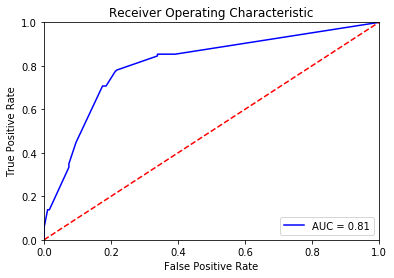

In [15]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Our model can be considered as a skilfull one since its AUC is quite large (0.81).This measure added with sensitivity and specificity rates can make us the applied model as a good one.